In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\Job profiles\Code_notes\Deep Learning\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature extraction and scaling 

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Surname'].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [7]:
df['Surname'].nunique()

2932

In [8]:
df.drop(columns= ['Surname','RowNumber','CustomerId'], inplace= True)

In [9]:
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first= True, dtype= int)

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
df['CreditScore'].min()

350

In [12]:
df['CreditScore'].max()

850

In [13]:
import matplotlib.pyplot as plt


In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
x = df.drop(columns= ['Exited'])
y = df['Exited']

from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled

array([[ 1.61891139,  2.68083968, -1.38815638, ..., -0.57792762,
        -0.56811207, -1.09582175],
       [-0.58142977, -1.52297528, -0.00703509, ..., -0.57792762,
        -0.56811207,  0.91255717],
       [-1.51553687,  0.48339095, -0.35231541, ..., -0.57792762,
         1.76021608,  0.91255717],
       ...,
       [-0.40498732, -0.75864529, -1.7334367 , ...,  1.73032049,
        -0.56811207,  0.91255717],
       [ 1.57739552, -0.94972779,  1.3740862 , ..., -0.57792762,
        -0.56811207,  0.91255717],
       [-0.23892384,  2.20313344, -0.69759573, ...,  1.73032049,
        -0.56811207,  0.91255717]])

## Training the model


In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()

model.add(Dense(11,activation= 'relu', input_dim = 11))
model.add(Dense(11,activation= 'relu'))
model.add(Dense(3,activation= 'relu'))
model.add(Dense(1,activation='relu'))

c:\Users\SIDDHARTH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 304 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [39]:
model.fit(x_train_scaled,y_train,epochs= 50, validation_split= 0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8669 - loss: 0.3364 - val_accuracy: 0.8512 - val_loss: 0.3637
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8576 - loss: 0.3482 - val_accuracy: 0.8575 - val_loss: 0.3620
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3302 - val_accuracy: 0.8512 - val_loss: 0.3716
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3350 - val_accuracy: 0.8550 - val_loss: 0.3743
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3281 - val_accuracy: 0.8494 - val_loss: 0.3616
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8731 - loss: 0.3402 - val_accuracy: 0.8525 - val_loss: 0.3794
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8686 - loss: 0.3373 - val_accuracy: 0.8500 - val_loss: 0.4135
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8641 - loss: 0.3349 - val_accuracy: 0.

In [40]:
y_predicted = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## Finding Threshold for prediction

In [24]:
from sklearn.metrics import roc_curve


In [41]:
fpr, tpr , thresholds = roc_curve(y_test, y_predicted)


In [52]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.26566416e-04,
       6.26566416e-04, 1.25313283e-03, 1.25313283e-03, 1.87969925e-03,
       1.87969925e-03, 2.50626566e-03, 2.50626566e-03, 3.13283208e-03,
       3.13283208e-03, 3.75939850e-03, 3.75939850e-03, 4.38596491e-03,
       4.38596491e-03, 5.01253133e-03, 5.01253133e-03, 5.63909774e-03,
       5.63909774e-03, 6.26566416e-03, 6.26566416e-03, 8.14536341e-03,
       8.14536341e-03, 1.00250627e-02, 1.00250627e-02, 1.06516291e-02,
       1.06516291e-02, 1.12781955e-02, 1.12781955e-02, 1.37844612e-02,
       1.37844612e-02, 1.44110276e-02, 1.44110276e-02, 1.56641604e-02,
       1.56641604e-02, 1.75438596e-02, 1.75438596e-02, 1.81704261e-02,
       1.81704261e-02, 1.87969925e-02, 1.87969925e-02, 1.94235589e-02,
       1.94235589e-02, 2.00501253e-02, 2.00501253e-02, 2.13032581e-02,
       2.13032581e-02, 2.25563910e-02, 2.25563910e-02, 2.31829574e-02,
       2.31829574e-02, 2.38095238e-02, 2.38095238e-02, 2.44360902e-02,
      

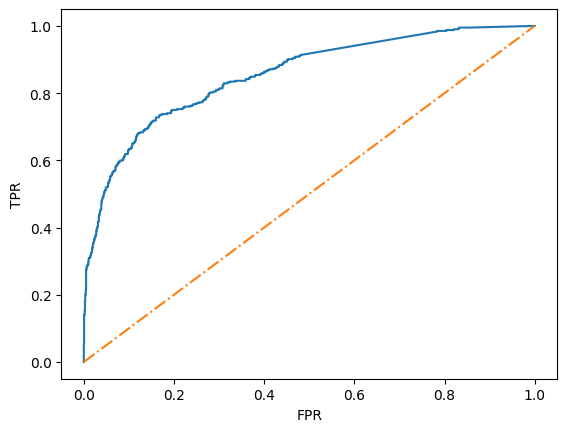

In [57]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '-.')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [42]:
j_statistic = tpr - fpr
optimal_idx = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_idx]

In [43]:
optimal_threshold

0.27455622

In [68]:
y_result = np.where(y_predicted > optimal_threshold.6, 1, 0)

In [30]:
y_predicted

array([[0.3669501 ],
       [0.0574481 ],
       [0.36018676],
       ...,
       [0.0574481 ],
       [0.31669205],
       [0.94069445]], dtype=float32)

## Finding accuracy for the model


In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_result)

0.8535

In [70]:
from sklearn.metrics import recall_score
recall_score(y_test,y_result)

0.3712871287128713

In [71]:
from sklearn.metrics import f1_score
f1_score(y_test,y_result)

0.5059021922428331